[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/drbob-richardson/stat220/blob/main/Assignments/Stat_220_HW1.ipynb)


**Problem 1**. Give an example of a variable that is (a) categorical; (b) quantitative; (c) discrete; (d) continuous.



*   Categorical: type of pizza topping
*   Quantitative: price of a pizza
*   Discrete: number of pizzas bought
*   Continuous: time spent eating pizza

**Problem 2**. Analyze the Carbon_West data file using the following code.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
carbon_west = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Carbon_West.dat")


Part a. Construct a histogram of CO2 emissions.

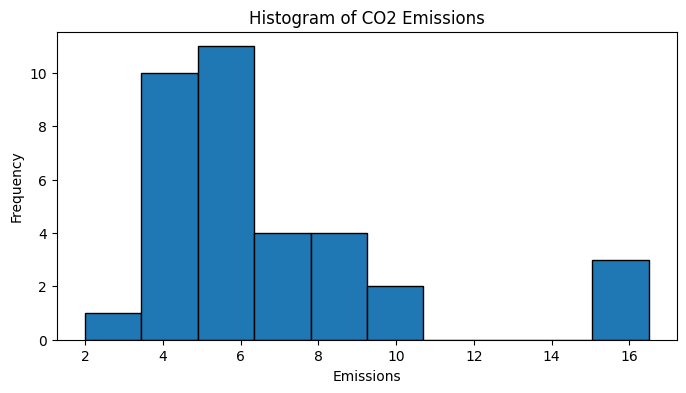

In [14]:
plt.figure(figsize=(8, 4))
plt.hist(carbon_west["CO2"], bins=10, edgecolor='black')
plt.title(f'Histogram of CO2 Emissions')
plt.xlabel("Emissions")
plt.ylabel('Frequency')
plt.show()

Part b. Find the mean, median, and standard deviation.

In [43]:
# Calculate mean, median, and standard deviation
mean_value = np.mean(carbon_west["CO2"])
median_value = np.median(carbon_west["CO2"])
std_deviation = np.std(carbon_west["CO2"])
variance = np.var(carbon_west["CO2"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Median: {median_value}")
print(f"Standard Deviation: {std_deviation}")
print(f"Variance: {variance}")

Mean: 6.717142857142858
Median: 5.9
Standard Deviation: 3.3086454469884727
Variance: 10.94713469387755


**Problem 3**. Read in the murder data set using the following code. The variable murder is the murder rate (per 100,000 population) for each state in the U.S. in 2017 according to the FBI Uniform Crime Reports. At first, do not use the observation for D.C. (DC).

In [39]:
murders = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Murder.dat")
murders.head(10)

,state,murder
0,AK,8.4
1,AL,8.3
2,AR,8.6
3,AZ,5.9
4,CA,4.6
5,CO,3.9
6,CT,2.8
7,DE,5.6
8,FL,5.0
9,GA,6.7


Part a. Find the mean and standard deviation for murders without D.C.

In [44]:
temp_murders = murders[murders['state'] != 'DC']
mean_value = np.mean(temp_murders["murder"])
std_deviation = np.std(temp_murders["murder"])

# Display the results
print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_deviation}")

Mean: 4.874
Standard Deviation: 2.560297638947472


Part b. Find the five-number  summary without D.C.

In [47]:
# Calculate the five-number summary
minimum = np.min(temp_murders["murder"])
q1 = np.percentile(temp_murders["murder"], 25)
median = np.median(temp_murders["murder"])
q3 = np.percentile(temp_murders["murder"], 75)
maximum = np.max(temp_murders["murder"])

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")

Minimum: 1.0
1st Quartile (Q1): 2.625
Median (Q2): 4.85
3rd Quartile (Q3): 6.175
Maximum: 12.4


Part c. Now include the observation for D.C. and recalculate the mean, median, and five-number summary. What is affected more by this outlier: The mean or the median? The range or the inter-quartile range?

In [48]:
# Calculate the five-number summary
mean = np.mean(murders["murder"])
minimum = np.min(murders["murder"])
q1 = np.percentile(murders["murder"], 25)
median = np.median(murders["murder"])
q3 = np.percentile(murders["murder"], 75)
maximum = np.max(murders["murder"])

# Display the five-number summary
print(f"Minimum: {minimum}")
print(f"1st Quartile (Q1): {q1}")
print(f"Median (Q2): {median}")
print(f"3rd Quartile (Q3): {q3}")
print(f"Maximum: {maximum}")
print(f"Mean: {mean}")

Minimum: 1.0
1st Quartile (Q1): 2.6500000000000004
Median (Q2): 5.0
3rd Quartile (Q3): 6.45
Maximum: 24.2
Mean: 5.252941176470588


The mean is more affected than the median by the outlier, and the range is more affected than the inter-quartile range.

**Problem 4**. Read in the Houses data file using the following code.  The variables include price (thousands of dollars), size (square feet), tax bill (dollars), number of bathrooms, number of bedrooms, and whether the house is new (1 = yes, 0 = no) for 100 home sales in Gainesville, Florida. Let
y = selling price and x = size of home.

In [19]:
houses = pd.read_fwf("https://stat4ds.rwth-aachen.de/data/Houses.dat")
houses.head(10)

,case,price,size,new,taxes,bedrooms,baths
0,1,419.85,2048,0,3104,4,2
1,2,219.75,912,0,1173,2,1
2,3,356.55,1654,0,3076,4,2
3,4,300.00,2068,0,1608,3,2
4,5,239.85,1477,0,1454,3,3
5,6,749.85,3153,1,2997,3,2
6,7,398.25,1355,0,4054,3,2
7,8,434.85,2075,1,3002,3,2
8,9,880.50,3990,0,6627,5,4
9,10,105.00,1160,0,320,3,2


Part a. Construct a scatterplot between square feet and price of a home.

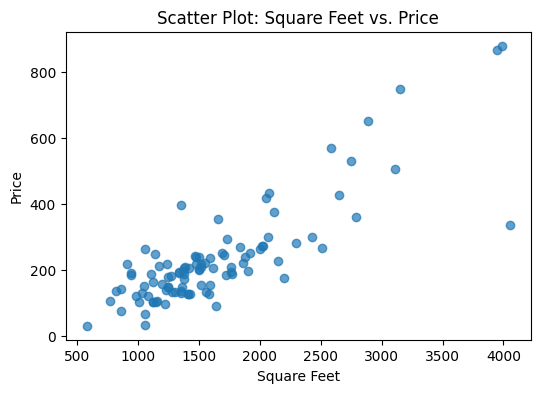

In [20]:
plt.figure(figsize=(6, 4))
plt.scatter(houses['size'], houses['price'], alpha=0.7)
plt.title('Scatter Plot: Square Feet vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')

plt.show()

Part b. Find the correlation between the two variables.

In [21]:
correlation = houses['size'].corr(houses['price'])

print(f'Correlation between Square Feet and Price: {correlation}')

Correlation between Square Feet and Price: 0.8337847885586537


Part c. Find and plot the regression line on top of the scatterplot.

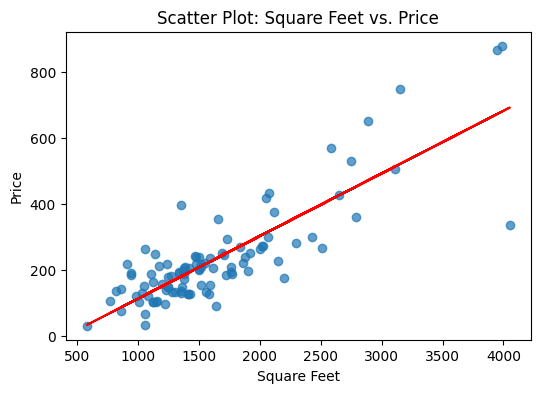

In [26]:
x = houses[['size']]
y = houses['price']

# Create a LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(x, y)

# Retrieve the coefficient (slope) and intercept of the linear regression
slope = model.coef_[0]
intercept = model.intercept_

# Plot the scatterplot
plt.figure(figsize=(6, 4))
plt.scatter(x, y, alpha=0.7)

# Plot the regression line
plt.plot(x, model.predict(x), color='red')

plt.title('Scatter Plot: Square Feet vs. Price')
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.show()

Part d. Create a side by side boxplot of price comparing homes that are new and homes that are not new.

<Figure size 800x600 with 0 Axes>

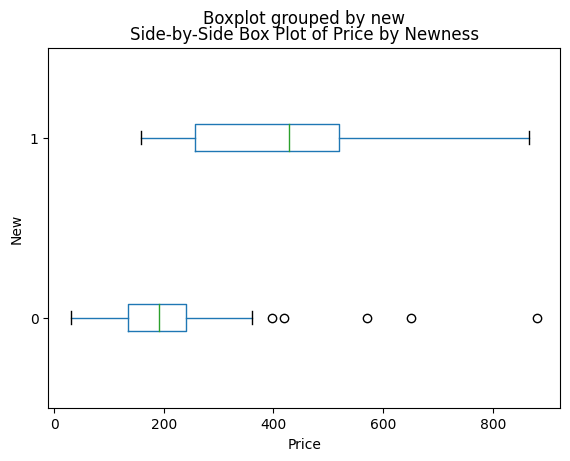

In [33]:
plt.figure(figsize=(8, 6))
houses.boxplot(column='price', by='new', vert=False, grid = False)
plt.title('Side-by-Side Box Plot of Price by Newness')
plt.xlabel('Price')
plt.ylabel('New')
plt.show()

Part e. What is the relationship between size and price.  Justify your answer using the plots created. Do the same for the relationship between price and whether or not a house is new, again using the plot to justify your answer.

The size and price have a strong positive correlation, as demonstrated with the positive sloping regression line. If the house is new it is more likely to be more expensive, with a few noticeable outliers seen in the box plots.

**Problem 5**. Using the Happy data file read in by the following code. Construct the contingency table relating marital status and happiness.

In [35]:
happy = pd.read_csv("https://stat4ds.rwth-aachen.de/data/Happy.dat", sep="\\s+")
happy.head(10)

,subject,happiness,marital,gender
0,1,1,1,male
1,2,1,1,male
2,3,1,1,male
3,4,1,1,male
4,5,1,1,male
5,6,1,1,male
6,7,1,1,male
7,8,1,1,male
8,9,1,1,male
9,10,1,1,male


In [36]:
pd.crosstab(happy["marital"], happy["happiness"])

happiness,1,2,3
marital,,,
1,432,504,61
2,92,282,103
3,124,409,135
